# AR(1) Example

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

arparams = np.array([0.5])
ar = np.r_[1, -arparams]
ar_process = sm.tsa.ArmaProcess(ar)
y = ar_process.generate_sample(nsample=200)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF')

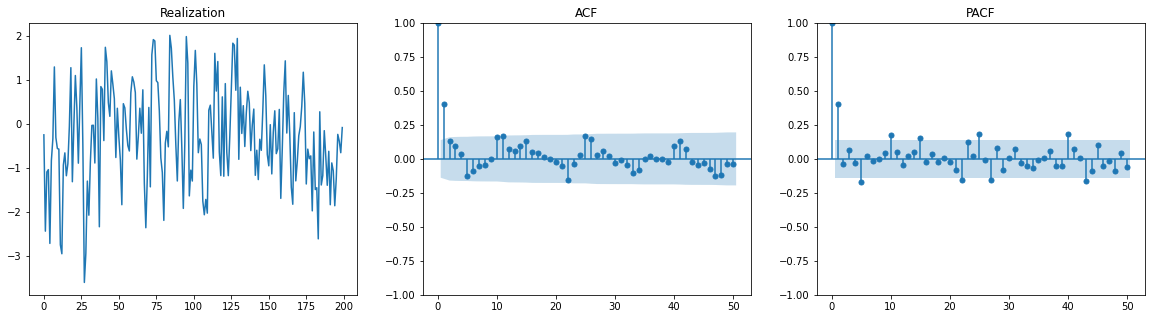

In [2]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].set_title('Realization')
ax[0].plot(y)
plot_acf(y, alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('ACF')
plot_pacf(y, alpha=0.05, lags=50, ax=ax[2])
ax[2].set_title('PACF')
# plt.savefig('AR(1)_Example.png', dpi=300, facecolor='w', bbox_inches = "tight");

In [82]:
ar_process.arroots

array([2.])

In [83]:
ar_process.isstationary

True

# AR(2) Example - Roots and Stationarity

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

arparams = np.array([-0.8, -0.48])
ar = np.r_[1, -arparams]
ar_process = sm.tsa.ArmaProcess(ar)
print('AR(2) Roots: ', ar_process.arroots)
print('AR(2) Stationarity: ', ar_process.isstationary)

AR(2) Roots:  [-0.83333333-1.1785113j -0.83333333+1.1785113j]
AR(2) Stationarity:  True


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


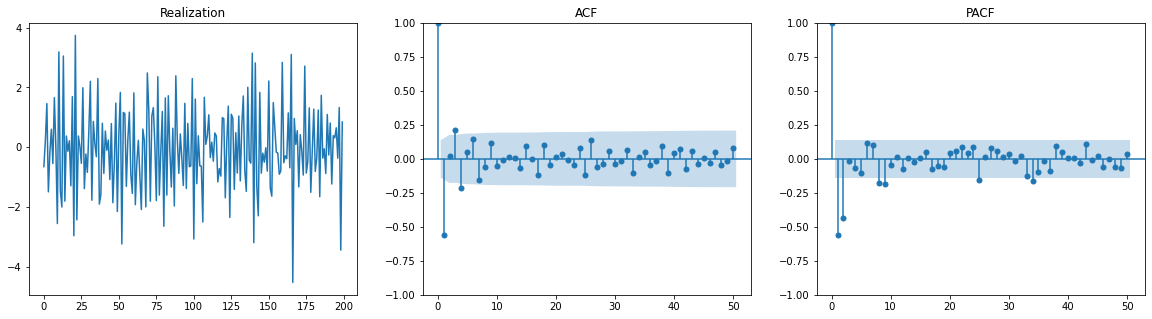

In [4]:
y = ar_process.generate_sample(nsample=200)

fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].set_title('Realization')
ax[0].plot(y)
plot_acf(y, alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('ACF')
plot_pacf(y, alpha=0.05, lags=50, ax=ax[2])
ax[2].set_title('PACF')
plt.savefig('AR(2)_ComplexConjugateExample.png', dpi=300, facecolor='w', bbox_inches = "tight");

# Proofing the math programmatically for removing the trend from a third-order AR(p) polynomial

## (1-2.5B-(-2.3B^2)-(0.8B^3))y_t = e_t
This can be factored into (1-1.5B-(-0.8B^2))(1-B)y_t=e_t. We can then remove the (1-B) with a first order difference.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF')

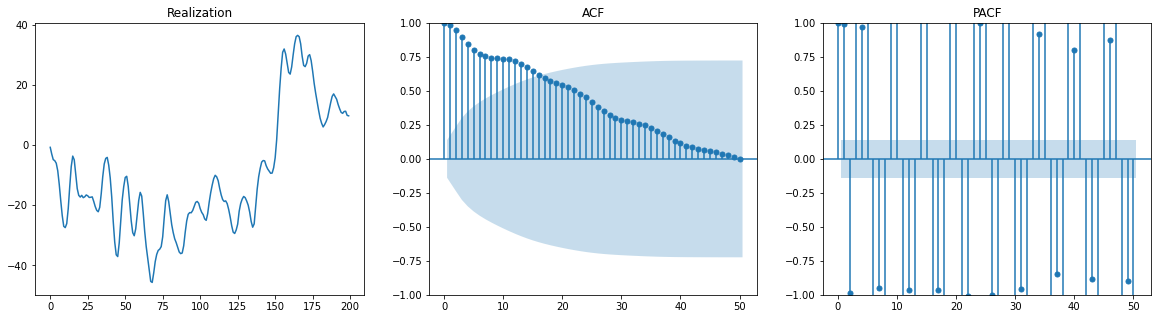

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

arparams = np.array([2.5, -2.3, 0.8])
maparams = np.array([0])
ar = np.r_[1, -arparams]
ma = np.r_[1, -maparams]
ar_process = sm.tsa.ArmaProcess(ar)
y = ar_process.generate_sample(nsample=200)

fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].set_title('Realization')
ax[0].plot(y)
plot_acf(y, alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('ACF')
plot_pacf(y, alpha=0.05, lags=50, ax=ax[2])
ax[2].set_title('PACF')
# plt.savefig('AR(3)_LinearTrend.png', dpi=300, facecolor='w', bbox_inches = "tight");

## Linear difference to remove the (1-B) from (1-1.5B-(-0.8B^2))(1-B)y_t = e_t

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF')

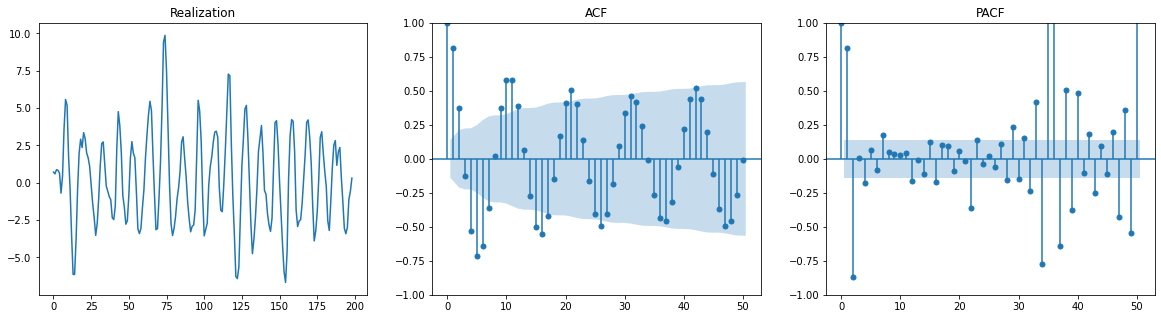

In [5]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].set_title('Realization')
ax[0].plot(np.diff(y, n=1))
plot_acf(np.diff(y, n=1), alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('ACF')
plot_pacf(np.diff(y, n=1), alpha=0.05, lags=50, ax=ax[2])
ax[2].set_title('PACF')
# plt.savefig('AR(3)_Detrended.png', dpi=300, facecolor='w', bbox_inches = "tight");

## Running (1-1.5B-(-0.8B^2))b_t = e_t after manually removing the factored (1-B) from (1-1.5B-(-0.8B^2))(1-B)y_t = y_t

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF')

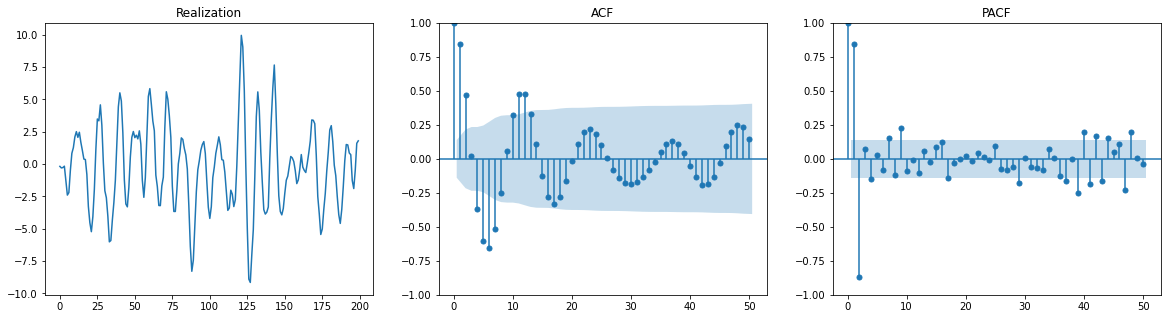

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

arparams = np.array([1.5, -0.8])
maparams = np.array([0])
ar = np.r_[1, -arparams]
ma = np.r_[1, -maparams]
ar_process = sm.tsa.ArmaProcess(ar)
y = ar_process.generate_sample(nsample=200)

fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].set_title('Realization')
ax[0].plot(y)
plot_acf(y, alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('ACF')
plot_pacf(y, alpha=0.05, lags=50, ax=ax[2])
ax[2].set_title('PACF')
# plt.savefig('AR(3)_Detrended.png', dpi=300, facecolor='w', bbox_inches = "tight");

## Running spectral density analysis on the detrended AR(2) process (1-1.5B-(-0.8B^2))X_t=a_t

Periodic (seasonal) around: 12.5 units


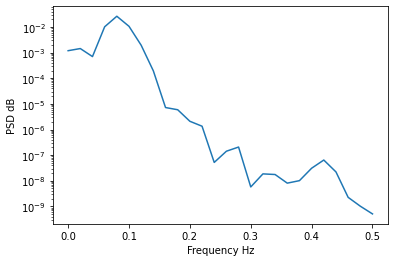

In [23]:
import pandas as pd
import scipy.signal
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm

x = acf(y, nlags=len(y))

(freq, pwr_spectral_density) = scipy.signal.periodogram(x,
                                  nfft=50,#int(2*np.sqrt(len(x))), # 200
                                  scaling='spectrum',
                                  fs=1, # sampling frequency
                                  window='parzen',
                                  return_onesided=True) # nfft is for truncation; length of fourier fast transform

periodicity = 1 / freq[np.where(pwr_spectral_density == pwr_spectral_density.max())[0][0]]
print('Periodic (seasonal) around: %s units' % periodicity)

import matplotlib.pyplot as plt

plt.semilogy(freq, pwr_spectral_density)
plt.xlabel('Frequency Hz')
plt.ylabel('PSD dB')
plt.show()

# AR(p) End-to-End Example

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

arparams = np.array([1.59, -0.544, -0.511, 0.222])
ar = np.r_[1, -arparams]
ar_process = sm.tsa.ArmaProcess(ar)
y = ar_process.generate_sample(nsample=200)

## Visually inspect lags

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].set_title('Realization')
ax[0].plot(y)
plot_acf(y, alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('ACF')
plot_pacf(y, alpha=0.05, lags=50, ax=ax[2])
ax[2].set_title('PACF')

## Test for autoregressive unit roots

In [129]:
from statsmodels.tsa.stattools import adfuller

dicky_fuller = adfuller(y, maxlag=25, regression='c')
print('Dickey-Fuller p-value: ', dicky_fuller[1])
print('Dickey-Fuller test statistic: ', dicky_fuller[0])
print('Dickey-Fuller critical value: ', dicky_fuller[4].get('5%'))

Dickey-Fuller p-value:  1.6668842047161513e-06
Dickey-Fuller test statistic:  -5.545206445371327
Dickey-Fuller critical value:  -2.8765564361715534


## Use information criterion to identify lags

In [140]:
from statsmodels.tsa.stattools import arma_order_select_ic

model_ar = arma_order_select_ic(y=y,
                                max_ar=4,
                                max_ma=0,
                                ic=['aic','bic'],
                                trend='n'
                               )

In [90]:
print('AIC Order Selection: ', model_ar.aic_min_order)
print('AIC Error: ', round(model_ar.aic.min()[0], 3))
print('BIC Order Selection: ', model_ar.bic_min_order)
print('BIC Error: ', round(model_ar.bic.min()[0], 3))

AIC Order Selection:  (4, 0)
AIC Error:  586.341
BIC Order Selection:  (2, 0)
BIC Error:  597.642


## Build model

In [182]:
from statsmodels.tsa.arima.model import ARIMA

ar_aic = ARIMA(y, order=(4,0,0),
                 enforce_stationarity=True).fit()

In [183]:
print(ar_aic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -287.919
Date:                Fri, 13 Jan 2023   AIC                            587.837
Time:                        16:58:24   BIC                            607.627
Sample:                             0   HQIC                           595.846
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1970      0.278     -0.709      0.478      -0.742       0.348
ar.L1          1.6217      0.068     23.920      0.000       1.489       1.755
ar.L2         -0.6877      0.131     -5.258      0.0

In [169]:
y[195:]

array([ 25.52640301,  18.87973367,   7.45858283,  -7.13160216,
       -17.92681996])

In [ ]:
y.shape

(200,)

## Test forecast

In [186]:
df_pred = ar_aic.get_prediction(start=195, end=199).summary_frame(alpha=0.05)
df_pred.index=[195,196,197,198,199]

In [189]:
df_pred

y,mean,mean_se,mean_ci_lower,mean_ci_upper
196,24.703910,0.999062,22.745786,26.662035
197,19.364527,0.999062,17.406403,21.322652
198,7.525904,0.999062,5.567779,9.484028
199,-5.874399,0.999062,-7.832524,-3.916274
200,-19.578480,0.999062,-21.536605,-17.620356


In [164]:
print('Average Squared Error: ', np.mean((df_pred['mean'] - y[195:])**2))

Average Squared Error:  1.04491865640564


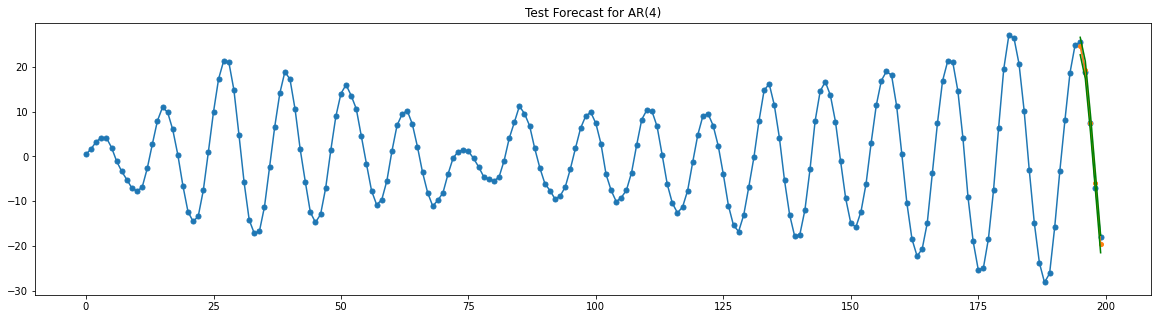

In [217]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(y, marker='o', markersize=5)
ax.plot(df_pred['mean'], marker='o', markersize=4)
ax.plot(df_pred['mean_ci_lower'], color='g')
ax.plot(df_pred['mean_ci_upper'], color='g')
ax.fill_between(df_pred.index, df_pred['mean_ci_lower'], df_pred['mean_ci_upper'], color='g', alpha=0.1)
ax.set_title('Test Forecast for AR(4)')
plt.savefig('AR(p)_Forecast_Test.png', dpi=300, facecolor='w', bbox_inches = "tight");

## Forecast, horizon = 5

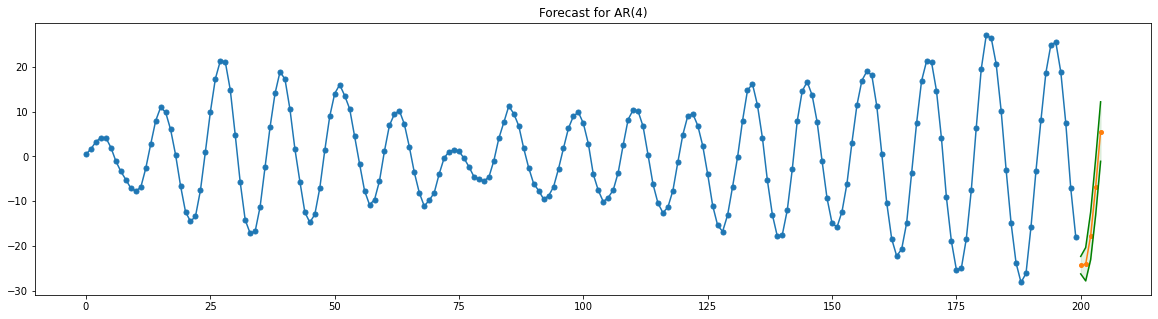

In [221]:
df_forecast = ar_aic.get_prediction(start=200, end=204).summary_frame(alpha=0.05)
df_forecast.index=[200, 201, 202, 203, 204]
forecast = np.hstack([np.repeat(np.nan, len(y)), df_pred['mean']])

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(y, marker='o', markersize=5)
ax.plot(df_forecast['mean'], marker='o', markersize=4)
ax.plot(df_forecast['mean_ci_lower'], color='g')
ax.plot(df_forecast['mean_ci_upper'], color='g')
ax.fill_between(df_forecast.index, df_forecast['mean_ci_lower'], df_forecast['mean_ci_upper'], color='g', alpha=0.1)
ax.set_title('Forecast for AR(4)')
plt.savefig('AR(p)_Forecast.png', dpi=300, facecolor='w', bbox_inches = "tight");

In [213]:
df_forecast

y,mean,mean_se,mean_ci_lower,mean_ci_upper
200,-24.319184,0.999062,-26.277309,-22.361059
201,-24.110739,1.903444,-27.841420,-20.380058
202,-17.755963,2.718117,-23.083374,-12.428551
203,-6.883647,3.219929,-13.194591,-0.572703
204,5.573859,3.397468,-1.085055,12.232774


# MA(1)

y_t = (1-0.8B)e_t

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

maparams = np.array([0.8]) # inserts into X_t - mu = (1-theta1B)a_t and not (1+theta1B)a_t
ma = np.r_[1, -maparams]
ma_process = sm.tsa.ArmaProcess(ma=ma)
print('MA(1) Roots: ', ma_process.maroots)
print('MA(1) Invertibility: ', ma_process.isinvertible)

MA(1) Roots:  [1.25]
MA(1) Invertibility:  True


In [72]:
ma_process.maroots

array([1.25])

In [78]:
y = ma_process.generate_sample(nsample=200)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


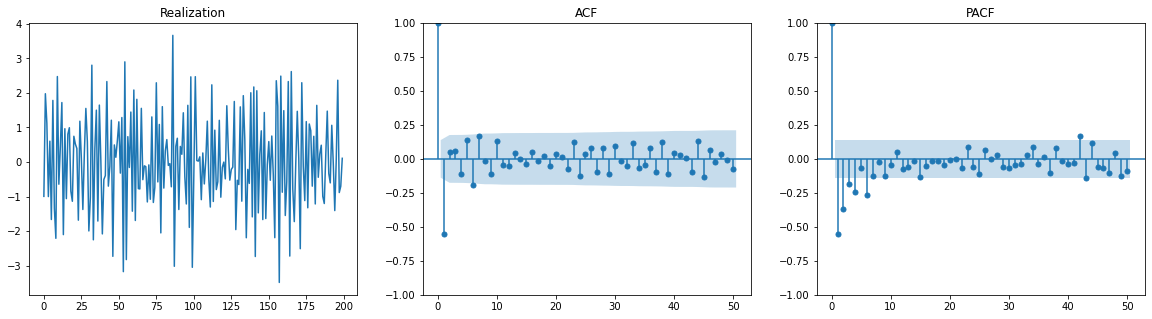

In [79]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].set_title('Realization')
ax[0].plot(y)
plot_acf(y, alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('ACF')
plot_pacf(y, alpha=0.05, lags=50, ax=ax[2])
ax[2].set_title('PACF')

plt.savefig('MA(1)_Example.png', dpi=300, facecolor='w', bbox_inches = "tight");

# MA(2)
y_t = (1-1.6B-0.9B^2)e_t

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

maparams = np.array([1.6, -0.9]) # inserts into X_t - mu = (1-theta1B)a_t and not (1+theta1B)a_t
ma = np.r_[1, -maparams]
ma_process = sm.tsa.ArmaProcess(ma=ma)
print('MA(2) Roots: ', ma_process.maroots)
print('MA(2) Invertibility: ', ma_process.isinvertible)

MA(2) Roots:  [0.88888889-0.56655772j 0.88888889+0.56655772j]
MA(2) Invertibility:  True


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


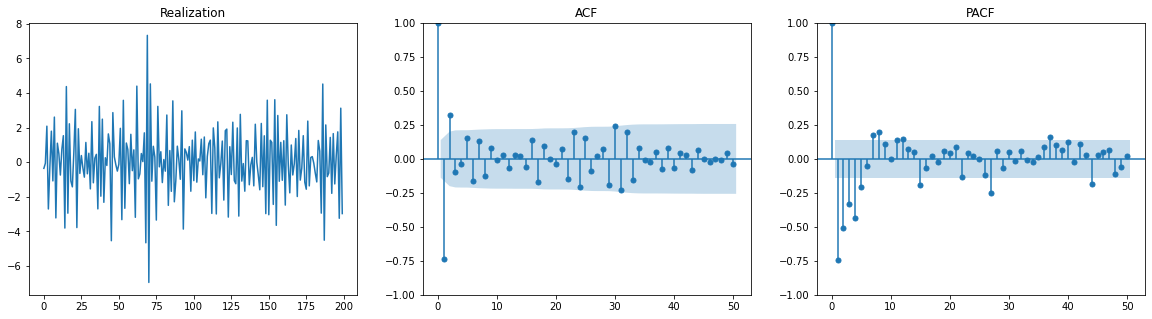

In [125]:
y = ma_process.generate_sample(nsample=200)

fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].set_title('Realization')
ax[0].plot(y)
plot_acf(y, alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('ACF')
plot_pacf(y, alpha=0.05, lags=50, ax=ax[2])
ax[2].set_title('PACF')

plt.savefig('MA(2)_Example.png', dpi=300, facecolor='w', bbox_inches = "tight");

# MA(q) End-to-End
y_t = (1+0.9B+0.8B^2+0.72B^3)e_t

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

maparams = np.array([-0.9, -0.8, -0.72]) # inserts into X_t - mu = (1-theta1B)a_t and not (1+theta1B)a_t
ma = np.r_[1, -maparams]
ma_process = sm.tsa.ArmaProcess(ma=ma)
print('MA(3) Roots: ', ma_process.maroots)
print('MA(3) Invertibility: ', ma_process.isinvertible)

MA(3) Roots:  [-1.11111111e+00+0.j         -2.43081136e-16-1.11803399j
 -2.43081136e-16+1.11803399j]
MA(3) Invertibility:  True


## Visually inspect lags

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'PACF')

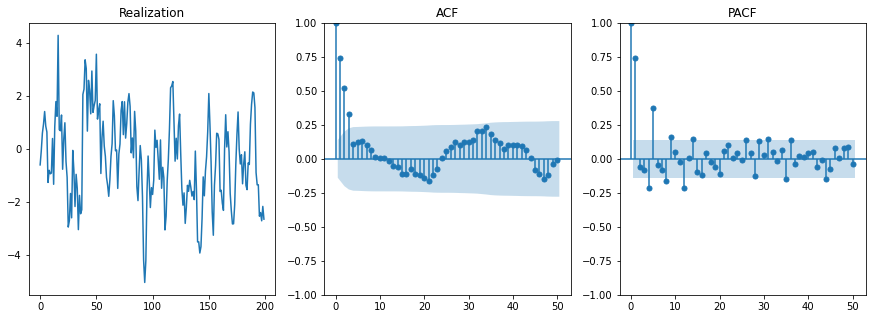

In [41]:
y = ma_process.generate_sample(nsample=200)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].set_title('Realization')
ax[0].plot(y)
plot_acf(y, alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('ACF')
plot_pacf(y, alpha=0.05, lags=50, ax=ax[2])
ax[2].set_title('PACF')

# plt.savefig('MA(2)_Example.png', dpi=300, facecolor='w', bbox_inches = "tight");

## Test for unit root
Similar to an autoregressive process, a moving average process may also be influenced by trend. Therefore, it is prudent to test for the presence of a unit root. Using the Dickey-Fuller test we used for the AR(p) model development process, we will test for a unit root here as well. 

In [43]:
from statsmodels.tsa.stattools import adfuller

dicky_fuller = adfuller(y, maxlag=25, regression='c')
print('Dickey-Fuller p-value: ', dicky_fuller[1])
print('Dickey-Fuller test statistic: ', dicky_fuller[0])
print('Dickey-Fuller critical value: ', dicky_fuller[4].get('5%'))

Dickey-Fuller p-value:  0.003189987997383385
Dickey-Fuller test statistic:  -3.773535541460488
Dickey-Fuller critical value:  -2.8770397560752436


## Use information criterion to identify lags

In [44]:
from statsmodels.tsa.stattools import arma_order_select_ic

model_ma = arma_order_select_ic(y=y,
                                max_ar=0,
                                max_ma=3,
                                ic=['aic','bic'],
                                trend='n'
                               )

In [45]:
print('AIC Order Selection: ', model_ma.aic_min_order)
print('AIC Error: ', round(model_ma.aic.min()[0], 3))
print('BIC Order Selection: ', model_ma.bic_min_order)
print('BIC Error: ', round(model_ma.bic.min()[0], 3))

AIC Order Selection:  (0, 3)
AIC Error:  785.224
BIC Order Selection:  (0, 3)
BIC Error:  788.522


## Build model

In [46]:
from statsmodels.tsa.arima.model import ARIMA

ma_aic = ARIMA(y, order=(0,0,3),
                 enforce_stationarity=True).fit()

print(ma_aic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -279.362
Date:                Tue, 17 Jan 2023   AIC                            568.723
Time:                        13:36:59   BIC                            585.215
Sample:                             0   HQIC                           575.397
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4074      0.230     -1.772      0.076      -0.858       0.043
ma.L1          0.8043      0.050     16.225      0.000       0.707       0.901
ma.L2          0.7550      0.057     13.309      0.0

## Test forecast

In [178]:
df_pred = ma_aic.get_prediction(start=195, end=199).summary_frame(alpha=0.05)
df_pred.index=[195,196,197,198,199]

In [179]:
df_pred

y,mean,mean_se,mean_ci_lower,mean_ci_upper
195,-1.596715,0.976342,-3.510310,0.316880
196,-0.553221,0.976342,-2.466816,1.360373
197,-2.533010,0.976342,-4.446605,-0.619415
198,-0.867313,0.976342,-2.780908,1.046282
199,-1.499840,0.976342,-3.413435,0.413755


In [180]:
print('Average Squared Error: ', np.mean((df_pred['mean'] - y[195:])**2))

Average Squared Error:  1.098022598831154


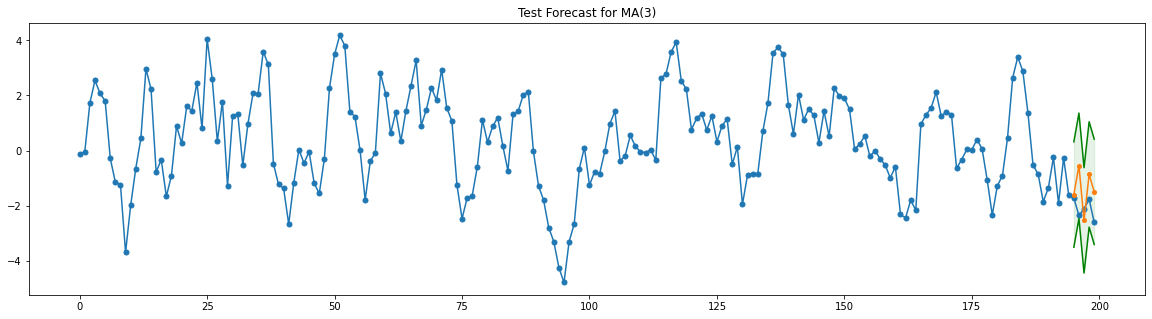

In [181]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(y, marker='o', markersize=5)
ax.plot(df_pred['mean'], marker='o', markersize=4)
ax.plot(df_pred['mean_ci_lower'], color='g')
ax.plot(df_pred['mean_ci_upper'], color='g')
ax.fill_between(df_pred.index, df_pred['mean_ci_lower'], df_pred['mean_ci_upper'], color='g', alpha=0.1)
ax.set_title('Test Forecast for MA(3)')
plt.savefig('MA(3)_Forecast_Test.png', dpi=300, facecolor='w', bbox_inches = "tight");

## Forecast horizon = 5

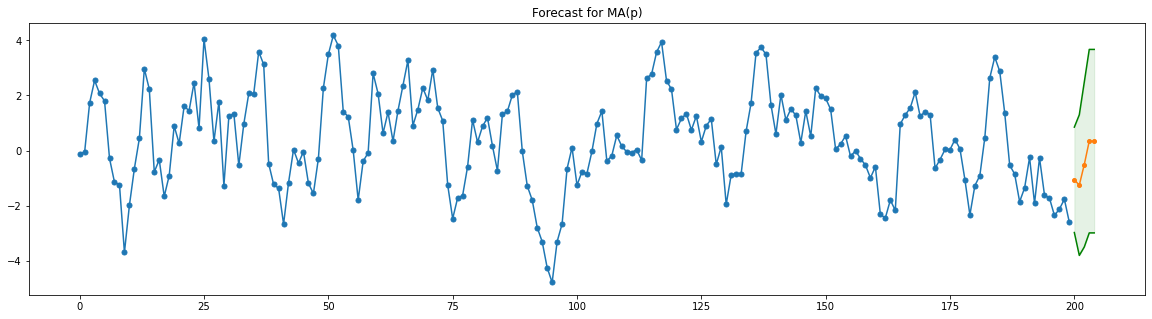

In [182]:
df_forecast = ma_aic.get_prediction(start=200, end=204).summary_frame(alpha=0.05)
df_forecast.index=[200, 201, 202, 203, 204]
forecast = np.hstack([np.repeat(np.nan, len(y)), df_pred['mean']])

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(y, marker='o', markersize=5)
ax.plot(df_forecast['mean'], marker='o', markersize=4)
ax.plot(df_forecast['mean_ci_lower'], color='g')
ax.plot(df_forecast['mean_ci_upper'], color='g')
ax.fill_between(df_forecast.index, df_forecast['mean_ci_lower'], df_forecast['mean_ci_upper'], color='g', alpha=0.1)
ax.set_title('Forecast for MA(p)')
plt.savefig('MA(p)_Forecast.png', dpi=300, facecolor='w', bbox_inches = "tight");

# ARMA(4,2)
(1+0.6451B-0.7488B^2-0.7688B^3-0.986B^4)y_t = (1+1.7844B+0.9756B^2)e_t

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

arparams = np.array([1.2, -0.6]) # inserts into X_t - mu = (1-theta1B)a_t and not (1+theta1B)a_t
ar = np.r_[1, -arparams]
maparams = np.array([0.5]) # inserts into X_t - mu = (1-theta1B)a_t and not (1+theta1B)a_t
ma = np.r_[1, -maparams]
arma_process = sm.tsa.ArmaProcess(ar=ar, ma=ma)
print('AR(4) Roots: ', arma_process.arroots)
print('AR(4) Invertibility: ', arma_process.isstationary)

print('MA(2) Roots: ', arma_process.maroots)
print('MA(2) Invertibility: ', arma_process.isinvertible)

AR(4) Roots:  [1.-0.81649658j 1.+0.81649658j]
AR(4) Invertibility:  True
MA(2) Roots:  [2.]
MA(2) Invertibility:  True


In [ ]:
y = arma_process.generate_sample(nsample=200)

## Visuall inspect lags

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


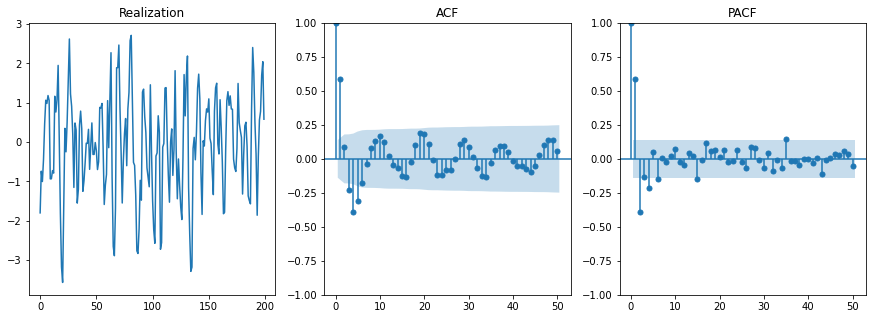

In [44]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].set_title('Realization')
ax[0].plot(y)
plot_acf(y, alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('ACF')
plot_pacf(y, alpha=0.05, lags=50, ax=ax[2])
ax[2].set_title('PACF')

# plt.savefig('ARMA(2,1)_Example.png', dpi=300, facecolor='w', bbox_inches = "tight");

# Test for unit root

In [47]:
from statsmodels.tsa.stattools import adfuller

dicky_fuller = adfuller(y, maxlag=25, regression='c')
print('Dickey-Fuller p-value: ', dicky_fuller[1])
print('Dickey-Fuller test statistic: ', dicky_fuller[0])
print('Dickey-Fuller critical value: ', dicky_fuller[4].get('5%'))

Dickey-Fuller p-value:  6.090665062133195e-16
Dickey-Fuller test statistic:  -9.40370671340928
Dickey-Fuller critical value:  -2.876401960790147


## Use information criterion to identify lags

In [45]:
from statsmodels.tsa.stattools import arma_order_select_ic

model_arma = arma_order_select_ic(y=y,
                                max_ar=4,
                                max_ma=1,
                                ic=['aic','bic'],
                                trend='n'
                               )

In [46]:
print('AIC Order Selection: ', model_arma.aic_min_order)
print('AIC Error: ', round(model_arma.aic.min()[0], 3))
print('BIC Order Selection: ', model_arma.bic_min_order)
print('BIC Error: ', round(model_arma.bic.min()[0], 3))

AIC Order Selection:  (4, 1)
AIC Error:  548.527
BIC Order Selection:  (2, 1)
BIC Error:  565.019


## Build model

In [43]:
from statsmodels.tsa.arima.model import ARIMA

arma_aic = ARIMA(y, order=(4,0,1),
                 enforce_stationarity=True,
                 enforce_invertibility=True
                  ).fit()

print(ma_aic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -267.418
Date:                Fri, 20 Jan 2023   AIC                            548.836
Time:                        10:32:34   BIC                            571.924
Sample:                             0   HQIC                           558.180
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0952      0.091     -1.041      0.298      -0.274       0.084
ar.L1          0.2234      0.209      1.067      0.286      -0.187       0.634
ar.L2          0.0506      0.172      0.294      0.7

In [48]:
from statsmodels.tsa.arima.model import ARIMA

arma_aic = ARIMA(y, order=(2,0,1),
                 enforce_stationarity=True,
                 enforce_invertibility=True
                  ).fit()

print(ma_aic.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -270.382
Date:                Fri, 20 Jan 2023   AIC                            550.765
Time:                        11:08:43   BIC                            567.256
Sample:                             0   HQIC                           557.439
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0960      0.075     -1.287      0.198      -0.242       0.050
ar.L1          1.2765      0.094     13.616      0.000       1.093       1.460
ar.L2         -0.6526      0.058    -11.241      0.0

## Test forecast

In [49]:
df_pred = arma_aic.get_prediction(start=195, end=199).summary_frame(alpha=0.05)
df_pred.index=[195,196,197,198,199]

In [52]:
df_pred

y,mean,mean_se,mean_ci_lower,mean_ci_upper
195,-0.019109,0.932933,-1.847625,1.809406
196,0.584460,0.932933,-1.244056,2.412975
197,0.479364,0.932933,-1.349152,2.307879
198,0.914009,0.932933,-0.914506,2.742525
199,0.809130,0.932933,-1.019386,2.637645


In [55]:
print('Average Squared Error: ', np.mean((df_pred['mean'] - y[195:])**2))

Average Squared Error:  0.6352208223437921


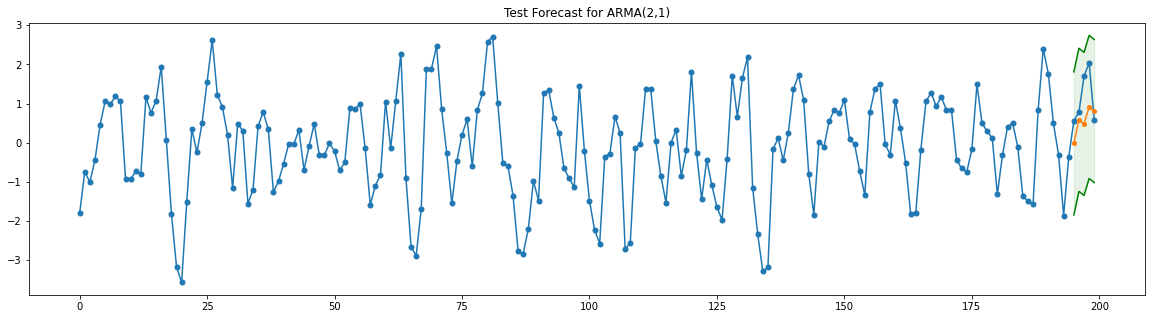

In [63]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(y, marker='o', markersize=5)
ax.plot(df_pred['mean'], marker='o', markersize=4)
ax.plot(df_pred['mean_ci_lower'], color='g')
ax.plot(df_pred['mean_ci_upper'], color='g')
ax.fill_between(df_pred.index, df_pred['mean_ci_lower'], df_pred['mean_ci_upper'], color='g', alpha=0.1)
ax.set_title('Test Forecast for ARMA(2,1)')
# plt.savefig('ARMA(2,1)_Forecast_Test.png', dpi=300, facecolor='w', bbox_inches = "tight");

## Forecast horizon = 5

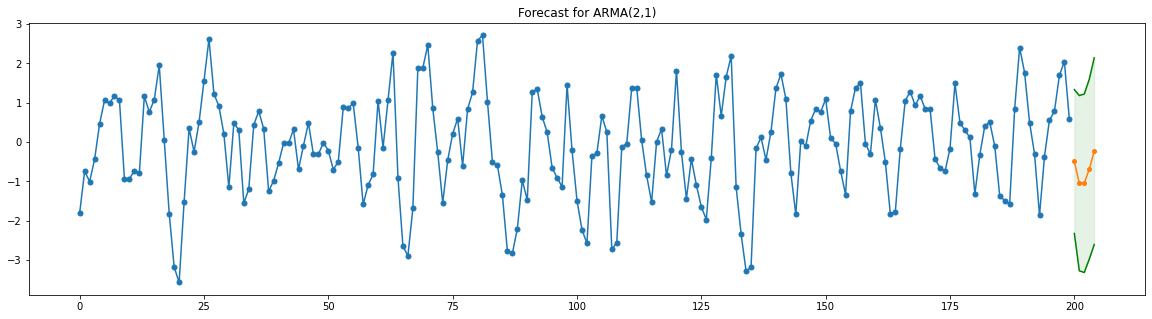

In [67]:
df_forecast = arma_aic.get_prediction(start=200, end=204).summary_frame(alpha=0.05)
df_forecast.index=[200, 201, 202, 203, 204]
forecast = np.hstack([np.repeat(np.nan, len(y)), df_pred['mean']])

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(y, marker='o', markersize=5)
ax.plot(df_forecast['mean'], marker='o', markersize=4)
ax.plot(df_forecast['mean_ci_lower'], color='g')
ax.plot(df_forecast['mean_ci_upper'], color='g')
ax.fill_between(df_forecast.index, df_forecast['mean_ci_lower'], df_forecast['mean_ci_upper'], color='g', alpha=0.1)
ax.set_title('Forecast for ARMA(2,1)')
# plt.savefig('ARMA(p,q)_Forecast.png', dpi=300, facecolor='w', bbox_inches = "tight");